# **Exploratory Data Analysis (EDA)**

## **Step 1: Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("Setup Complete")

Setup Complete


In [2]:
unicorn_filepath = '/content/unicorn_companies.csv'
unicorn_data = pd.read_csv(unicorn_filepath)

print("Setup Complete")

Setup Complete


## **Step 2: Data Exploration**

In [3]:
unicorn_data.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
unicorn_data.tail(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,6/29/17,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/17,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/21,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/21,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,9/16/20,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [5]:
unicorn_data.sample(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
788,SeekOut,$1B,1/12/22,Internet software & services,Bellevue,United States,North America,2017,$189M,"Mayfield, Madrona Venture Group, Tiger Global ..."
894,Clara,$1B,12/6/21,Fintech,Mexico City,Mexico,North America,2020,$109M,"DST Global, General Catalyst, Monashees+"
47,Ripple,$10B,12/20/19,Fintech,San Francisco,United States,North America,2012,$294M,"IDG Capital, Venture51, Lightspeed Venture Par..."
494,Pattern,$2B,10/6/21,Internet software & services,Lehi,United States,North America,2013,$277M,"Knox Lane, Ainge Advisory, Carlson Private Cap..."
299,Illumio,$3B,4/14/15,Cybersecurity,Sunnyvale,United States,North America,2013,$558M,"Data Collective, Formation 8, General Catalyst..."


In [6]:
unicorn_data.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City',
       'Country/Region', 'Continent', 'Year Founded', 'Funding',
       'Select Investors'],
      dtype='object')

In [7]:
unicorn_data.shape

(1074, 10)

In [8]:
unicorn_data.drop_duplicates().shape

(1074, 10)

In [9]:
unicorn_data.nunique()

,0
Company,1073
Valuation,30
Date Joined,639
Industry,16
City,256
Country/Region,46
Continent,6
Year Founded,35
Funding,539
Select Investors,1058


In [10]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [11]:
unicorn_data.dtypes

,0
Company,object
Valuation,object
Date Joined,object
Industry,object
City,object
Country/Region,object
Continent,object
Year Founded,int64
Funding,object
Select Investors,object


## **Step 3: Handling Missing Values**

In [12]:
missing_values = unicorn_data.isnull().sum()
missing_values

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,16
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,1


In [13]:
unicorn_data['City'] = unicorn_data['City'].fillna('Unknown')
unicorn_data['Select Investors'] = unicorn_data['Select Investors'].fillna('Unknown')

print("Missing Values Handled")

Missing Values Handled


In [14]:
missing_values = unicorn_data.isnull().sum()
missing_values

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,0
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,0


## **Step 4: Data Cleaning**

In [15]:
def cleaning_data(value):
    if isinstance(value,str):
      if 'B' in value:
        return float(value.replace('B', '').replace('$', ''))
      elif 'M' in value:
        return float(value.replace('M', '').replace('$', '')) / 1000
    return 0

unicorn_data['Valuation'] = unicorn_data['Valuation'].apply(cleaning_data)
unicorn_data['Funding'] = unicorn_data['Funding'].apply(cleaning_data)

print("Data Cleaned")

Data Cleaned


In [16]:
unicorn_data['Date Joined'] = pd.to_datetime(unicorn_data['Date Joined'])

print("Date Joined Column Converted")

Date Joined Column Converted


<ipython-input-16-4a2436fe595b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unicorn_data['Date Joined'] = pd.to_datetime(unicorn_data['Date Joined'])


In [17]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 84.0+ KB


In [18]:
unicorn_data['Years to Unicorn'] = unicorn_data['Date Joined'].dt.year - unicorn_data['Year Founded']

print("'Years to Unicorn' Column Created")

'Years to Unicorn' Column Created


In [19]:
year_founded_data = unicorn_data['Year Founded']
unicorn_data.drop(columns=['Year Founded'], inplace=True)
unicorn_data.insert(2, 'Year Founded', year_founded_data)

print("'Year Founded' Column Moved")

'Year Founded' Column Moved


In [20]:
years_to_unicorn_data = unicorn_data['Years to Unicorn']
unicorn_data.drop(columns=['Years to Unicorn'], inplace=True)
unicorn_data.insert(4, 'Years to Unicorn', years_to_unicorn_data)

print("'Years to Unicorn' Column Moved")

'Years to Unicorn' Column Moved


In [21]:
unicorn_data

,Company,Valuation,Year Founded,Date Joined,Years to Unicorn,Industry,City,Country/Region,Continent,Funding,Select Investors
0,Bytedance,180.0,2012,2017-04-07,5,Artificial intelligence,Beijing,China,Asia,8.000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2002,2012-12-01,10,Other,Hawthorne,United States,North America,7.000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2008,2018-07-03,10,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2.000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2010,2014-01-23,4,Fintech,San Francisco,United States,North America,2.000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2005,2011-12-12,6,Fintech,Stockholm,Sweden,Europe,4.000,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.0,2012,2017-06-29,5,E-commerce & direct-to-consumer,Shanghai,China,Asia,0.379,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1.0,2015,2017-04-18,2,E-commerce & direct-to-consumer,Beijing,China,Asia,0.990,"58.com, Tencent Holdings"
1071,Zihaiguo,1.0,2018,2021-05-06,3,Consumer & retail,Chongqing,China,Asia,0.080,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1.0,2005,2021-10-19,16,Fintech,London,United Kingdom,Europe,0.792,"IAG Capital Partners, Augmentum Fintech, North..."


In [22]:
unicorn_data['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [23]:
unicorn_data['City'].unique()

array(['Beijing', 'Hawthorne', 'Shenzhen', 'San Francisco', 'Stockholm',
       'Surry Hills', 'London', 'Cary', 'Unknown', 'Jacksonville',
       'Bengaluru', 'Jakarta', 'Shanghai', 'Philadelphia', 'Waltham',
       'New York', 'Pittsburgh', 'Istanbul', 'San Diego', 'Roseville',
       'Changsha', 'Tallinn', 'Luohe', 'Munich', 'Gurugram', 'Boston',
       'Glendale', 'Cheung Sha Wan', 'Walpole', 'Seoul', 'Fremont',
       'Mountain View', 'Lerma de Villada', 'Berlin', 'Kirkland',
       'Mumbai', 'Santa Clara', 'Vancouver', 'San Jose', 'San Mateo',
       'Irving', 'Chicago', 'Redwood City', 'Hoboken', 'Palo Alto',
       'Toronto', 'Los Angeles', 'Hangzhou', 'Changzhou', 'Melbourne',
       'Amsterdam', 'Paris', 'Oakland', 'Brooklyn', 'Helsinki',
       'Burlingame', 'Tel Aviv', 'Zhuhai', 'Guangzhou', 'Vilnius',
       'Irvine', 'Copenhagen', 'Brussels', 'Bogota', 'Sao Paulo',
       'Atlanta', 'Campinas', 'Montreal', 'Bellevue', 'Gurgaon', 'Noida',
       'Suzhou', 'El Segundo', 'Fa

In [24]:
unicorn_data['Country/Region'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Turkey', 'Estonia', 'Germany',
       'Hong Kong', 'South Korea', 'Mexico', 'Canada', 'Netherlands',
       'France', 'Finland', 'Israel', 'Lithuania', 'Denmark', 'Belgium',
       'Colombia', 'Brazil', 'Singapore', 'Austria', 'Ireland',
       'United Arab Emirates', 'Switzerland', 'Vietnam', 'South Africa',
       'Thailand', 'Norway', 'Chile', 'Argentina', 'Bermuda', 'Japan',
       'Spain', 'Malaysia', 'Senegal', 'Philippines', 'Luxembourg',
       'Nigeria', 'Czech Republic', 'Croatia', 'Italy'], dtype=object)

In [25]:
unicorn_data['Continent'].unique()

array(['Asia', 'North America', 'Europe', 'Oceania', 'South America',
       'Africa'], dtype=object)

In [26]:
industry_replacements = {
    'Fintech': 'Financial Technology',
    'Data management & analytics': 'Data Management & Analytics',
    'Internet software & services': 'Internet Software & Services',
    'Supply chain, logistics, & delivery': 'Supply Chain, Logistics, & Delivery',
    'Artificial intelligence': 'Artificial Intelligence',
    'E-commerce & direct-to-consumer': 'E-commerce & Direct-to-Consumer',
    'Mobile & telecommunications': 'Mobile & Telecommunications',
    'Auto & transportation': 'Auto & Transportation',
    'Edtech': 'Education Technology',
    'Consumer & retail': 'Consumer & Retail',
}

unicorn_data['Industry'] = unicorn_data['Industry'].replace(industry_replacements)

print("'Industry' Replacements Successful")

'Industry' Replacements Successful


In [27]:
unicorn_data['Industry'].unique()

array(['Artificial Intelligence', 'Other',
       'E-commerce & Direct-to-Consumer', 'Financial Technology',
       'Internet Software & Services',
       'Supply Chain, Logistics, & Delivery', 'Consumer & Retail',
       'Data Management & Analytics', 'Education Technology', 'Health',
       'Hardware', 'Auto & Transportation', 'Travel', 'Cybersecurity',
       'Mobile & Telecommunications'], dtype=object)

In [28]:
unicorn_data.nunique()

,0
Company,1073
Valuation,30
Year Founded,35
Date Joined,639
Years to Unicorn,31
Industry,15
City,257
Country/Region,46
Continent,6
Funding,538


## **Step 5: Statistics**

In [29]:
unicorn_data.describe()

,Valuation,Year Founded,Date Joined,Years to Unicorn,Funding
count,1074.000000,1074.000000,1074,1074.000000,1074.000000
mean,3.455307,2012.895717,2020-05-19 15:35:51.955307264,7.000931,0.551043
min,1.000000,1919.000000,2007-07-02 00:00:00,-4.000000,0.000000
25%,1.000000,2011.000000,2019-05-20 06:00:00,4.000000,0.218000
50%,2.000000,2014.000000,2021-03-29 00:00:00,6.000000,0.365000
75%,3.000000,2016.000000,2021-09-19 18:00:00,9.000000,0.603000
max,180.000000,2021.000000,2022-04-05 00:00:00,98.000000,14.000000
std,8.547022,5.698573,NaN,5.329672,0.807719


### Top 25 Most Valuable Unicorns (**before** removing the outliers)

---



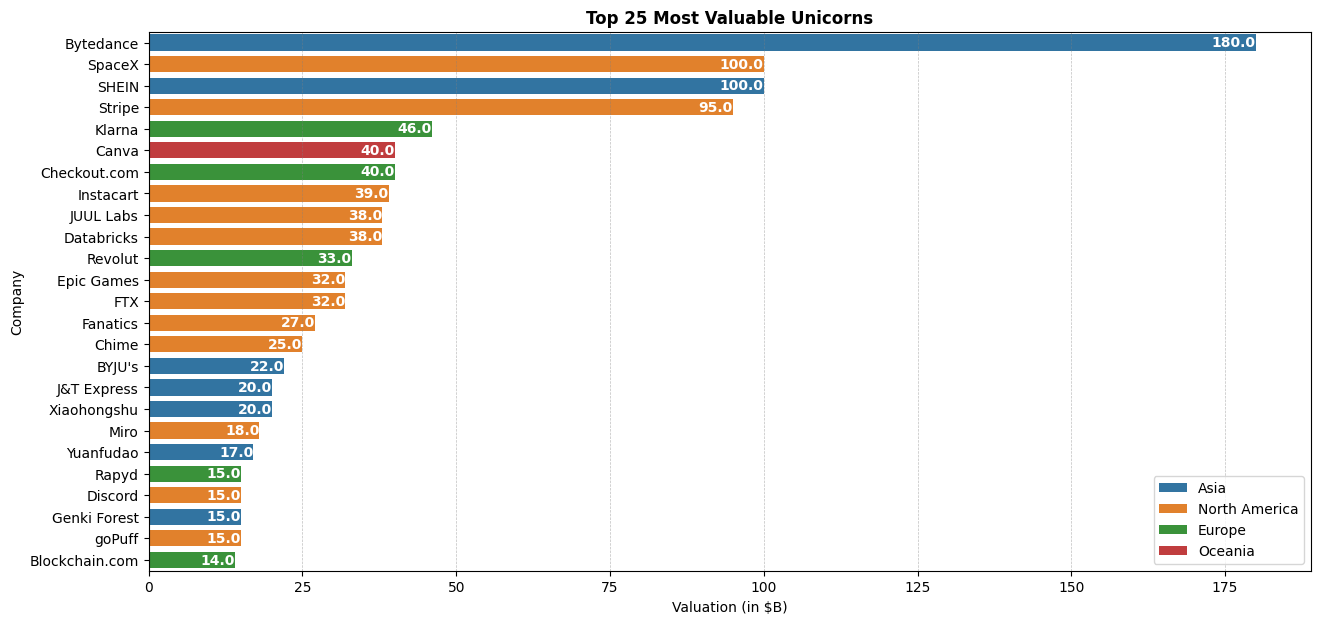

In [30]:
plt.figure(figsize=(15, 7))

top_25_unicorns = unicorn_data.sort_values(by=['Valuation'], ascending=False).head(25)
sns.barplot(data=top_25_unicorns, x='Valuation', y='Company', width=0.75, hue='Continent', palette='tab10')

plt.title('Top 25 Most Valuable Unicorns', fontsize=12, fontweight='bold')
plt.xlabel('Valuation (in $B)', fontsize=10)
plt.ylabel('Company', fontsize=10)
for index, value in enumerate(top_25_unicorns['Valuation']):
    plt.text(value, index, str(value), ha='right', va='center', color='white', fontweight='bold')
plt.legend()
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

In [31]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

unicorn_data = remove_outliers(unicorn_data, 'Valuation')
unicorn_data = remove_outliers(unicorn_data, 'Funding')
unicorn_data = remove_outliers(unicorn_data, 'Year Founded')

print("Outliers Removed")

Outliers Removed


### Top 25 Most Valuable Unicorns (**after** removing the outliers)

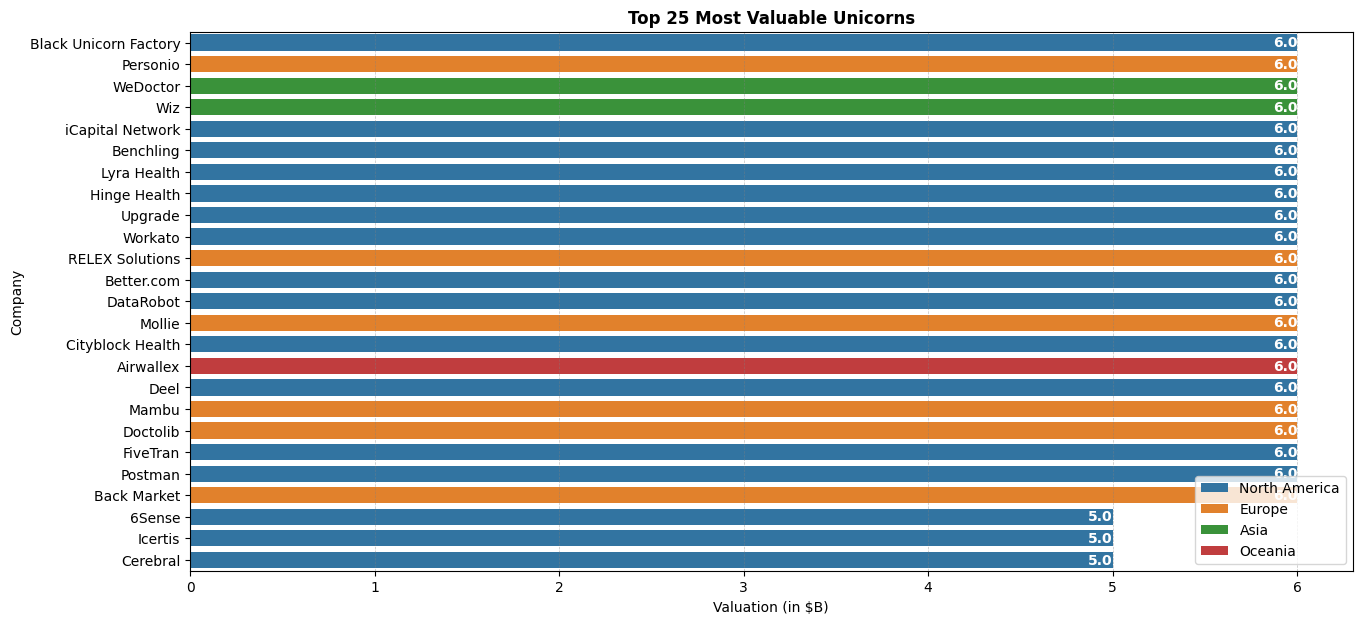

In [32]:
plt.figure(figsize=(15, 7))

top_25_unicorns = unicorn_data.sort_values(by=['Valuation'], ascending=False).head(25)
sns.barplot(data=top_25_unicorns, x='Valuation', y='Company', width=0.75, hue='Continent', palette='tab10')

plt.title('Top 25 Most Valuable Unicorns', fontsize=12, fontweight='bold')

plt.xlabel('Valuation (in $B)', fontsize=10)
plt.ylabel('Company', fontsize=10)
for index, value in enumerate(top_25_unicorns['Valuation']):
    plt.text(value, index, str(value), ha='right', va='center', color='white', fontweight='bold')
plt.legend()
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

In [33]:
unicorn_data.describe()

,Valuation,Year Founded,Date Joined,Years to Unicorn,Funding
count,911.000000,911.000000,911,911.000000,911.000000
mean,1.984632,2013.839737,2020-08-20 16:01:03.227223040,6.316136,0.391081
min,1.000000,2004.000000,2012-12-17 00:00:00,-4.000000,0.000000
25%,1.000000,2012.000000,2019-12-18 00:00:00,4.000000,0.209500
50%,2.000000,2014.000000,2021-05-05 00:00:00,6.000000,0.331000
75%,3.000000,2016.000000,2021-10-07 00:00:00,8.000000,0.520500
max,6.000000,2021.000000,2022-04-05 00:00:00,17.000000,1.000000
std,1.268288,3.527381,NaN,3.337919,0.242884


## **Step 6: Visualised Exploration**

### **Univariate Data Visualization**

#### Valuation and Funding Analysis

##### Distribution of Valuation (in $B)

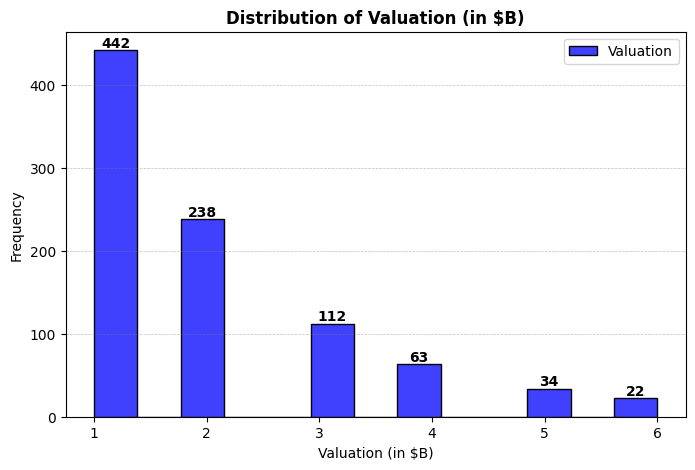

In [34]:
plt.figure(figsize=(8, 5))

distr_valuation = sns.histplot(unicorn_data['Valuation'], color='blue', edgecolor='black', alpha=0.75, label='Valuation')

plt.title('Distribution of Valuation (in $B)', fontsize=12, fontweight='bold')
plt.xlabel('Valuation (in $B)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
labels = []
for p in distr_valuation.patches:
  height = p.get_height()
  labels.append(str(height) if height else ' ')
distr_valuation.bar_label(distr_valuation.containers[0], labels=labels, label_type='edge', fontsize=10, fontweight='bold')
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

##### Distribution of Funding (in $B)

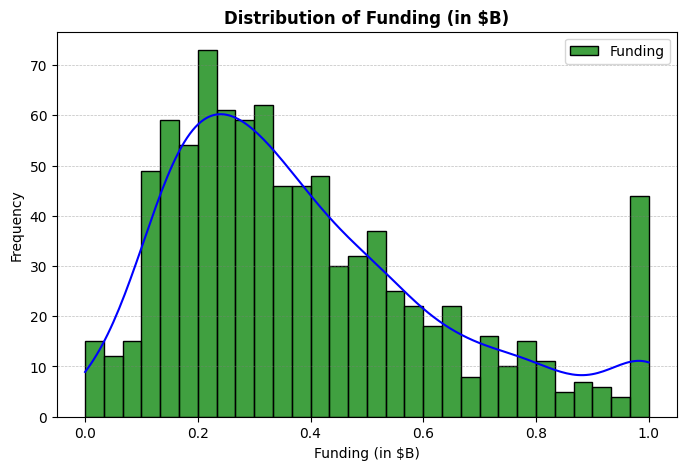

In [35]:
plt.figure(figsize=(8, 5))

distr_funding = sns.histplot(unicorn_data['Funding'], bins=30, kde=True, color='green', edgecolor='black', alpha=0.75, label='Funding')
distr_funding.lines[0].set_color('blue')

plt.title('Distribution of Funding (in $B)', fontsize=12, fontweight='bold')
plt.xlabel('Funding (in $B)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

#### Industry Analysis

##### Unicorns by Industry

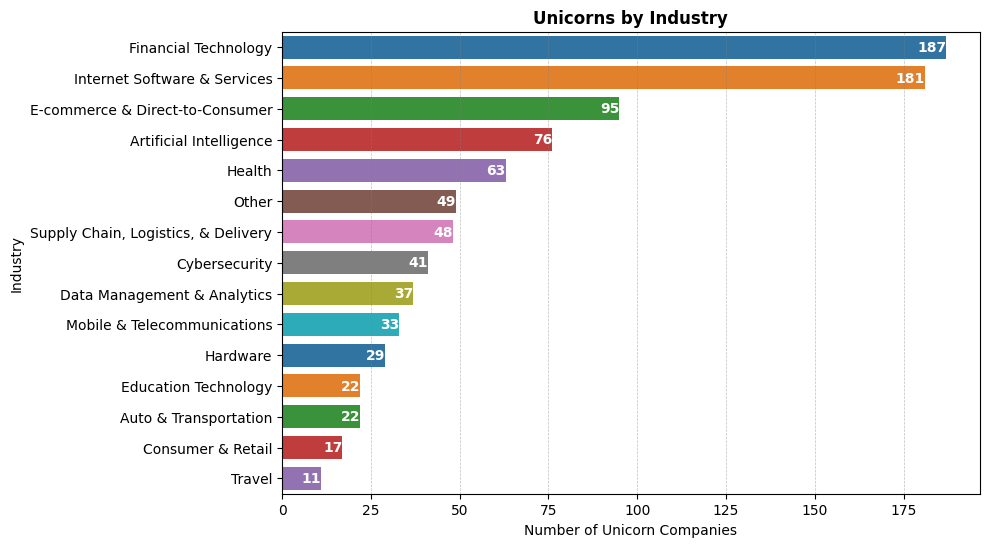

In [36]:
plt.figure(figsize=(9, 6))

industry_counts = unicorn_data['Industry'].value_counts()
sns.barplot(x=industry_counts.values, y=industry_counts.index, width=0.75, hue=industry_counts.index, palette='tab10')

plt.title('Unicorns by Industry', fontsize=12, fontweight='bold')
plt.xlabel('Number of Unicorn Companies', fontsize=10)
plt.ylabel('Industry', fontsize=10)
for index, value in enumerate(industry_counts.values):
    plt.text(value, index, str(value), ha='right', va='center', color='white', fontsize=10, fontweight='bold')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

#### Geography Analysis

##### Unicorns by Continent

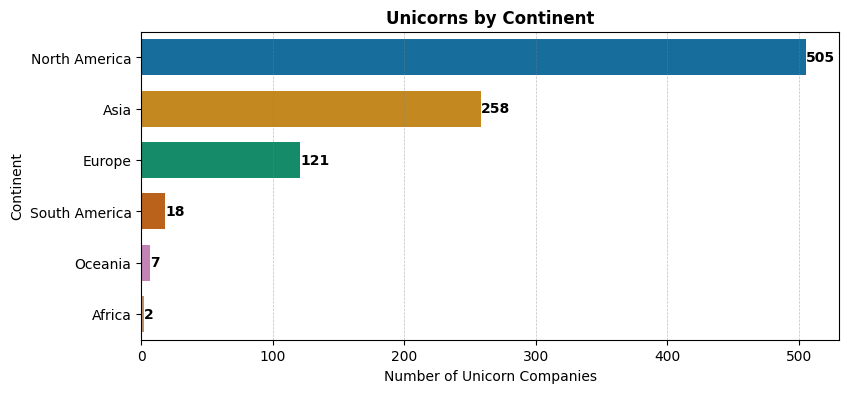

In [37]:
plt.figure(figsize=(9, 4))

continent_counts = unicorn_data['Continent'].value_counts()
sns.barplot(x=continent_counts.values, y=continent_counts.index, width=0.70, hue=continent_counts.index, palette='colorblind')

plt.title('Unicorns by Continent', fontsize=12, fontweight='bold')
plt.xlabel('Number of Unicorn Companies', fontsize=10)
plt.ylabel('Continent', fontsize=10)
for index, value in enumerate(continent_counts.values):
    plt.text(value, index, str(value), ha='left', va='center', color='black', fontsize=10, fontweight='bold')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

##### Top 10 Countries with the Most Unicorns

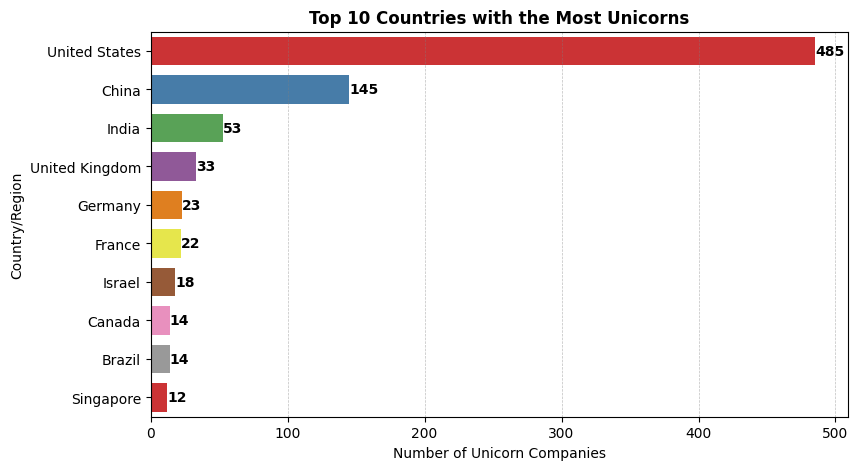

In [38]:
plt.figure(figsize=(9, 5))

top_10_countries = unicorn_data['Country/Region'].value_counts().head(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, width=0.75, hue=top_10_countries.index, palette='Set1')

plt.title('Top 10 Countries with the Most Unicorns', fontsize=12, fontweight='bold')
plt.xlabel('Number of Unicorn Companies', fontsize=10)
plt.ylabel('Country/Region', fontsize=10)
for index, value in enumerate(top_10_countries.values):
    plt.text(value, index, str(value), ha='left', va='center', color='black', fontsize=10, fontweight='bold')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

##### Top 10 Cities with the Most Unicorns

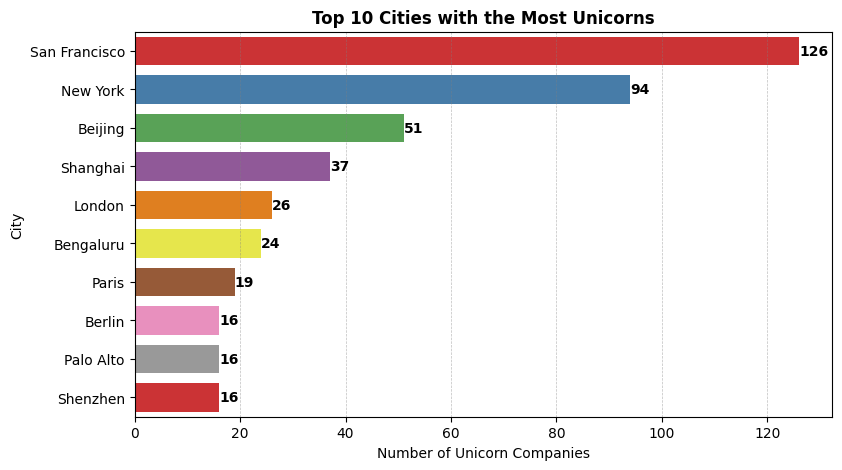

In [39]:
plt.figure(figsize=(9, 5))

top_10_cities = unicorn_data['City'].value_counts().head(10)
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, width=0.75, hue=top_10_cities.index, palette='Set1')

plt.title('Top 10 Cities with the Most Unicorns', fontsize=12, fontweight='bold')
plt.xlabel('Number of Unicorn Companies', fontsize=10)
plt.ylabel('City', fontsize=10)
for index, value in enumerate(top_10_cities.values):
    plt.text(value, index, str(value), ha='left', va='center', color='black', fontsize=10, fontweight='bold')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

#### Temporal Analysis

##### Unicorns Founded Per Year

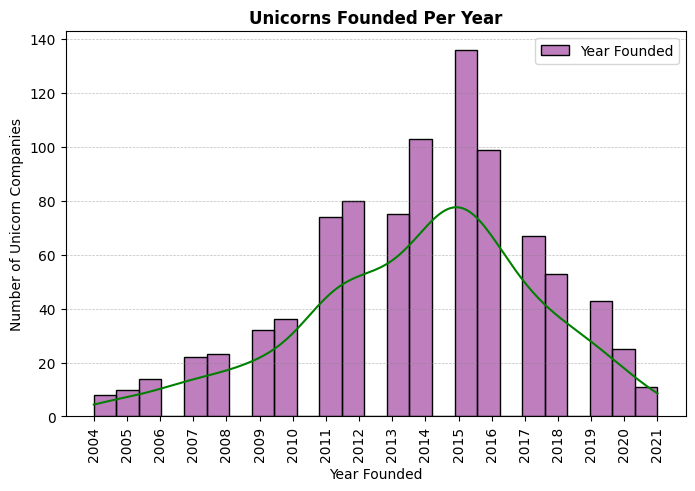

In [40]:
plt.figure(figsize=(8, 5))

distr_year_founded = sns.histplot(unicorn_data['Year Founded'], bins=25, kde=True, color='purple', edgecolor='black', alpha=0.50, label='Year Founded')
distr_year_founded.lines[0].set_color('green')

plt.title('Unicorns Founded Per Year', fontsize=12, fontweight='bold')
plt.xlabel('Year Founded', fontsize=10)
plt.ylabel('Number of Unicorn Companies', fontsize=10)
start_year_founded = int(unicorn_data['Year Founded'].min())
end_year_founded = int(unicorn_data['Year Founded'].max())
plt.xticks(range(start_year_founded, end_year_founded + 1, 1))
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

##### Unicorns Joined Per Year

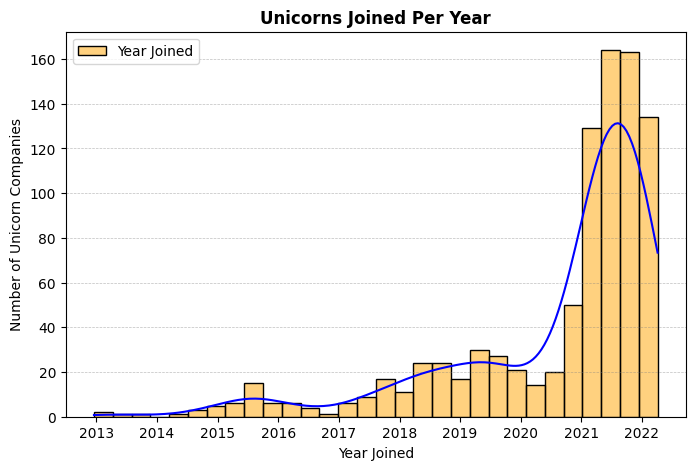

In [41]:
plt.figure(figsize=(8, 5))

distr_year_joined = sns.histplot(unicorn_data['Date Joined'], bins=30, kde=True, color='orange', edgecolor='black', alpha=0.50, label='Year Joined')
distr_year_joined.lines[0].set_color('blue')

plt.title('Unicorns Joined Per Year', fontsize=12, fontweight='bold')
plt.xlabel('Year Joined', fontsize=10)
plt.ylabel('Number of Unicorn Companies', fontsize=10)
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

##### Subplots: Companies Founded by Year, Companies Becoming Unicorns by Year

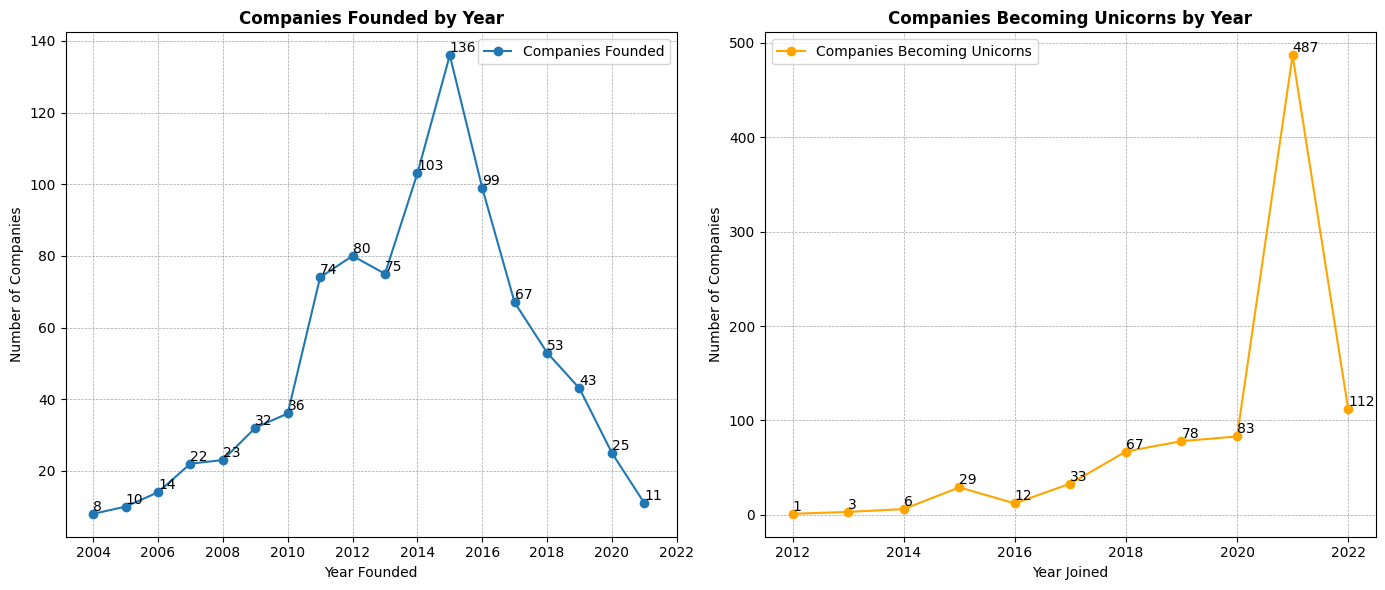

In [42]:
plt.figure(figsize=(14, 6))

year_founded_counts = unicorn_data['Year Founded'].value_counts().sort_index()
year_joined_counts = unicorn_data['Date Joined'].dt.year.value_counts().sort_index()


plt.subplot(1, 2, 1)
plt.plot(year_founded_counts.index, year_founded_counts.values, marker='o', label='Companies Founded')

plt.title('Companies Founded by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year Founded', fontsize=10)
plt.ylabel('Number of Companies', fontsize=10)
start_year_founded = int(unicorn_data['Year Founded'].min())
end_year_founded = int(unicorn_data['Year Founded'].max())
plt.xticks(range(start_year_founded, end_year_founded + 2, 2))
for index, value in zip(year_founded_counts.index, year_founded_counts.values):
     plt.text(index, value, str(value), ha='left', va='bottom', color='black', fontsize=10)
plt.legend()
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.50, alpha=0.70)


plt.subplot(1, 2, 2)
plt.plot(year_joined_counts.index, year_joined_counts.values, marker='o', color='orange', label='Companies Becoming Unicorns')

plt.title('Companies Becoming Unicorns by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year Joined', fontsize=10)
plt.ylabel('Number of Companies', fontsize=10)
for index, value in zip(year_joined_counts.index, year_joined_counts.values):
     plt.text(index, value, str(value), ha='left', va='bottom', color='black', fontsize=10)
plt.legend()
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.50, alpha=0.70)


plt.tight_layout()
plt.show()

#### Investors Analysis Part 1

##### Top 10 Investors of Unicorns

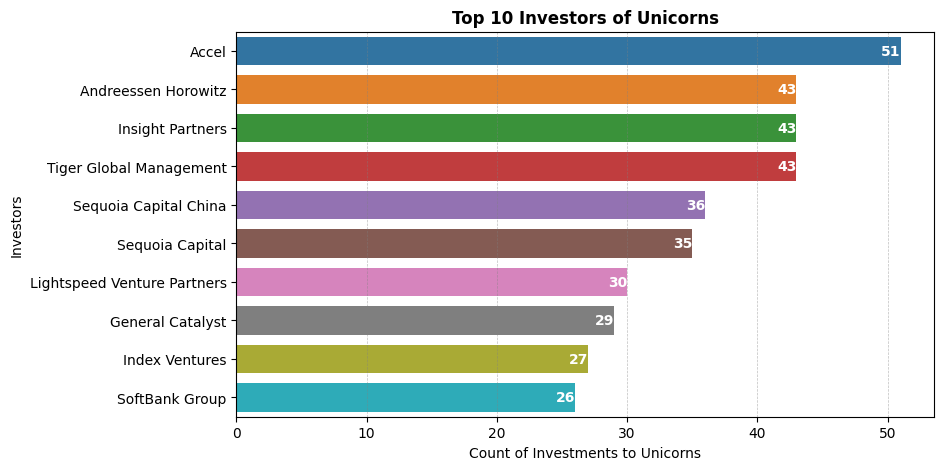

In [43]:
plt.figure(figsize=(9, 5))

investors = unicorn_data['Select Investors'].dropna().str.split(', ').sum()
investors_counts = Counter(investors).most_common(10)
investors_names, investors_frequencies =zip(*investors_counts)

sns.barplot(x=list(investors_frequencies), y=list(investors_names), width=0.75, hue=investors_counts, palette='tab10', legend=False)

plt.title('Top 10 Investors of Unicorns', fontsize=12, fontweight='bold')
plt.xlabel('Count of Investments to Unicorns', fontsize=10)
plt.ylabel('Investors', fontsize=10)
for index, value in enumerate(investors_frequencies):
    plt.text(value, index, str(value), ha='right', va='center', color='white', fontsize=10, fontweight='bold')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()

### **Bivariate Data Visualization**

#### Investors Analysis Part 2

##### Valuation Distribution of Unicorns across Industries

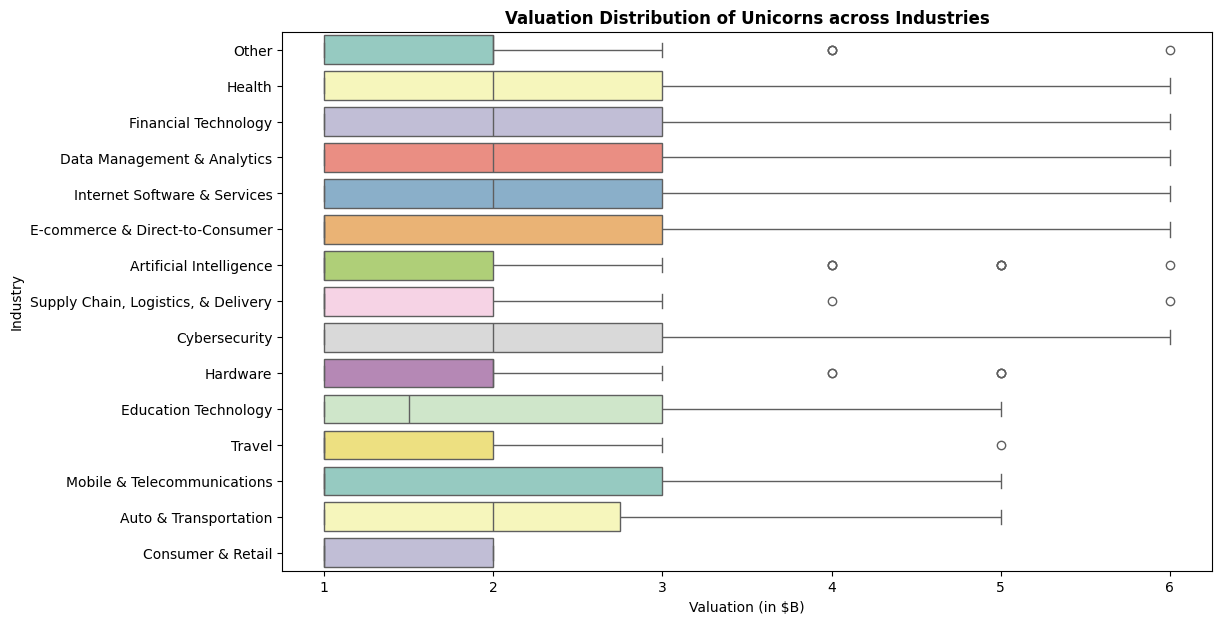

In [44]:
plt.figure(figsize=(12, 7))

sns.boxplot(x=unicorn_data['Valuation'], y=unicorn_data['Industry'], hue=unicorn_data['Industry'], palette='Set3')

plt.title('Valuation Distribution of Unicorns across Industries', fontsize=12, fontweight='bold')
plt.xlabel('Valuation (in $B)', fontsize=10)
plt.ylabel('Industry', fontsize=10)
plt.show()

##### Funding Distribution of Unicorns across Industries

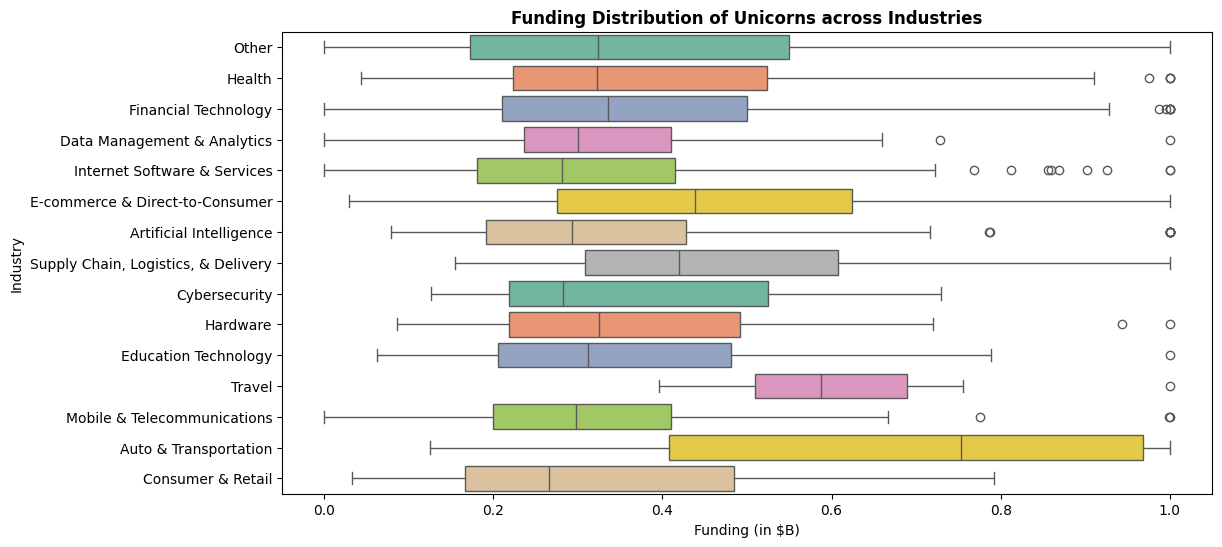

In [45]:
plt.figure(figsize=(12, 6))

sns.boxplot(x=unicorn_data['Funding'], y=unicorn_data['Industry'], hue=unicorn_data['Industry'], palette='Set2')

plt.title('Funding Distribution of Unicorns across Industries', fontsize=12, fontweight='bold')
plt.xlabel('Funding (in $B)', fontsize=10)
plt.ylabel('Industry', fontsize=10)
plt.show()

##### Valuation vs. Funding

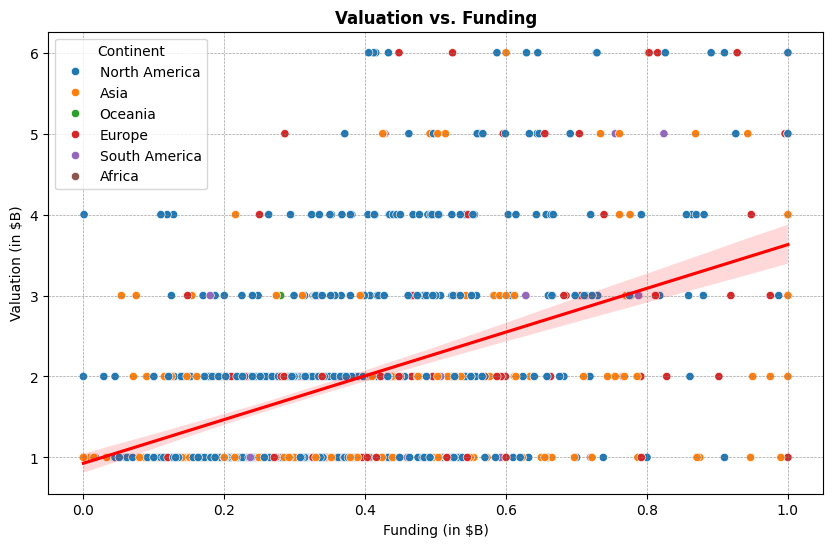

In [46]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unicorn_data, x='Funding', y='Valuation', hue='Continent',  palette='tab10')
sns.regplot(data=unicorn_data, x='Funding', y='Valuation', scatter=False, color='red', line_kws={'label': 'Trendline'})

plt.title('Valuation vs. Funding', fontsize=12, fontweight='bold')

plt.xlabel('Funding (in $B)', fontsize=10)
plt.ylabel('Valuation (in $B)', fontsize=10)
plt.legend(title='Continent')
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.50, alpha=0.75)
plt.show()

##### Funding vs. Time to Unicorn

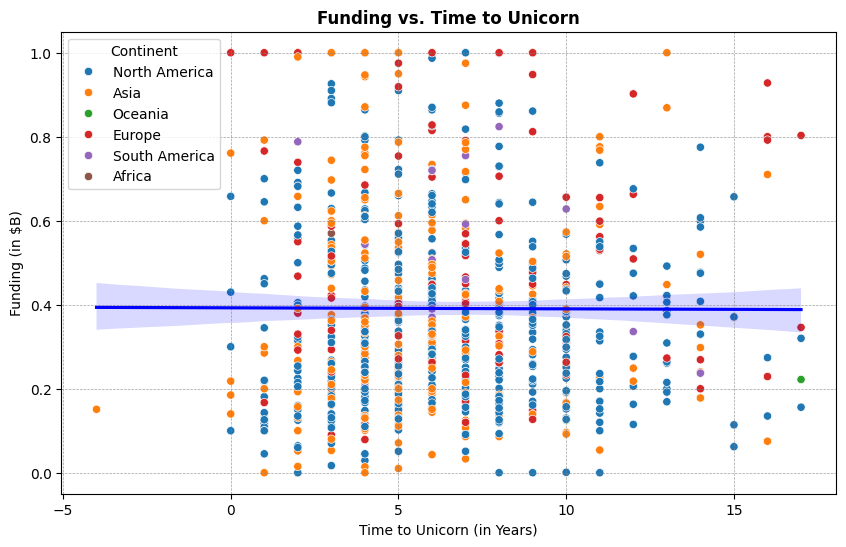

In [47]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unicorn_data, x='Years to Unicorn', y='Funding', hue='Continent', palette='tab10')
sns.regplot(data=unicorn_data, x='Years to Unicorn', y='Funding', scatter=False, color='blue', line_kws={'label': 'Trendline'})

plt.title('Funding vs. Time to Unicorn', fontsize=12, fontweight='bold')
plt.xlabel('Time to Unicorn (in Years)', fontsize=10)
plt.ylabel('Funding (in $B)', fontsize=10)
plt.legend(title='Continent')
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.50, alpha=0.75)
plt.show()

##### Valuation by Continent


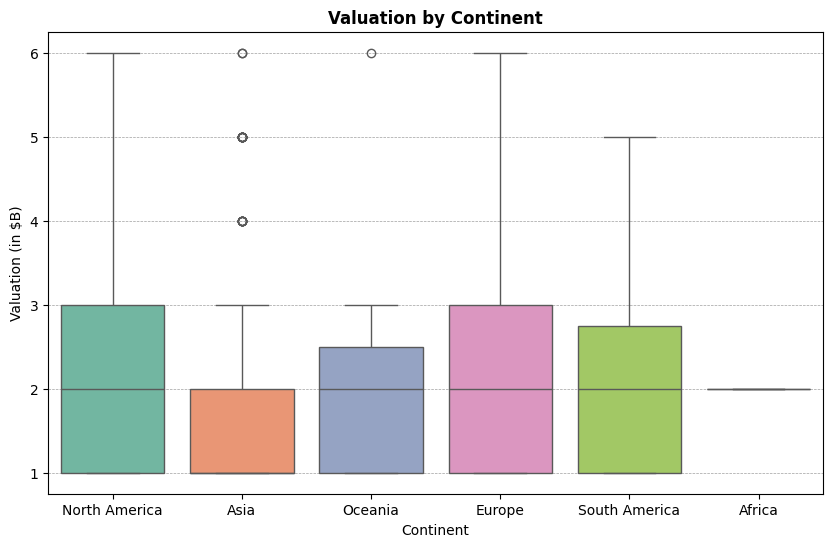

In [48]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=unicorn_data['Continent'], y=unicorn_data['Valuation'], hue=unicorn_data['Continent'], palette='Set2')

plt.title('Valuation by Continent', fontsize=12, fontweight='bold')
plt.xlabel('Continent', fontsize=10)
plt.ylabel('Valuation (in $B)', fontsize=10)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.50, alpha=0.75)
plt.show()

##### Industry vs. Continent: Number of Unicorns



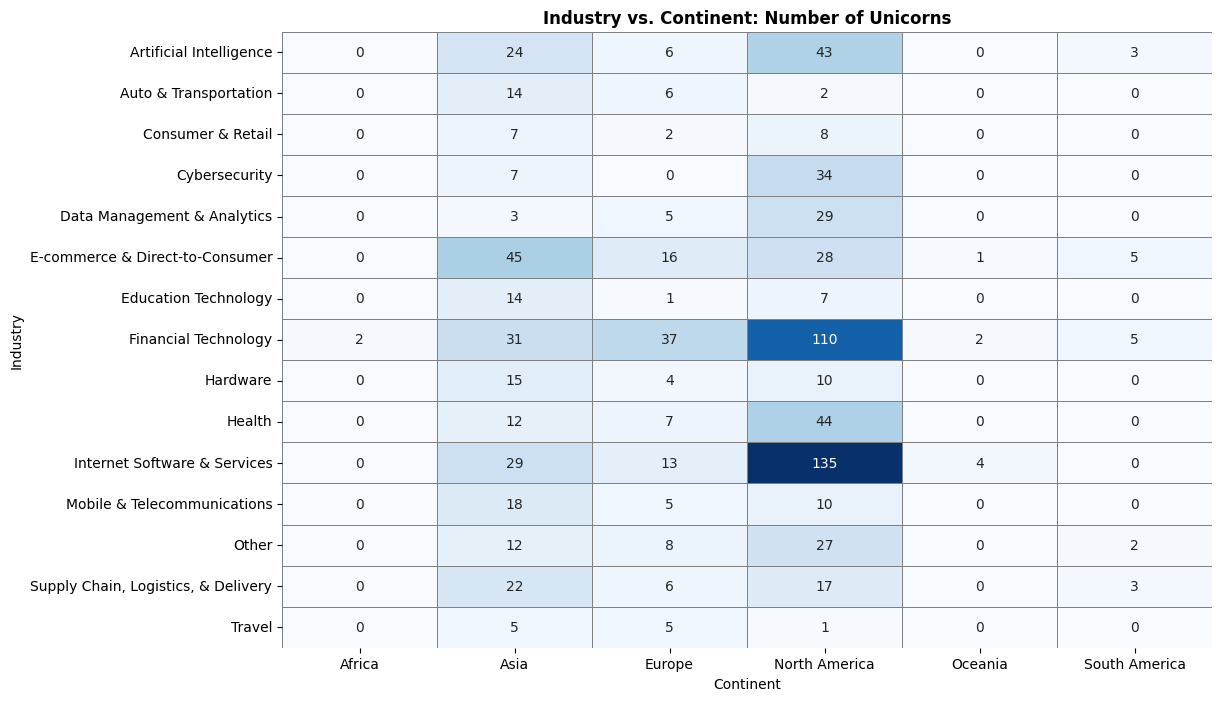

In [49]:
plt.figure(figsize=(12, 8))

industry_continent_matrix = unicorn_data.groupby(['Industry', 'Continent']).size().unstack(fill_value=0)
sns.heatmap(industry_continent_matrix, cmap='Blues', annot=True, fmt="d", linewidths=0.5, linecolor='gray', cbar=False,)

plt.title('Industry vs. Continent: Number of Unicorns', fontsize=12, fontweight='bold')
plt.xlabel('Continent', fontsize=10)
plt.ylabel('Industry', fontsize=10)
plt.show()

### **Multivariate Data Visualization**

#### Investors Analysis Part 3

##### Valuation vs. Funding by Continent

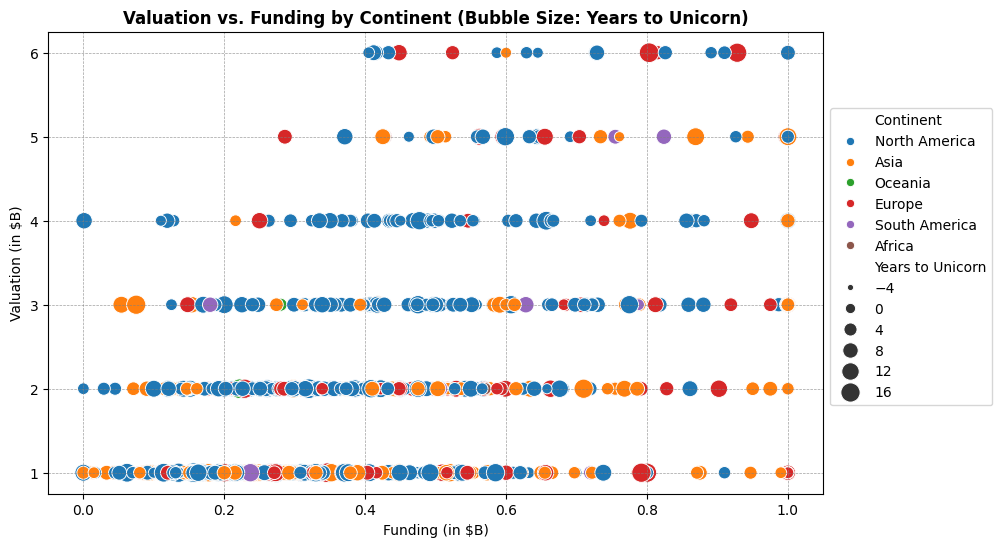

In [50]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=unicorn_data, x='Funding', y='Valuation', hue='Continent', palette='tab10', size='Years to Unicorn', sizes=(20, 200))

plt.title('Valuation vs. Funding by Continent (Bubble Size: Years to Unicorn)', fontsize=12, fontweight='bold')
plt.xlabel('Funding (in $B)', fontsize=10)
plt.ylabel('Valuation (in $B)', fontsize=10)
plt.legend(bbox_to_anchor=(1.00, 0.85), loc='upper left')
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.50, alpha=0.75)
plt.show()

##### FacetGrid: Valuation and Funding across Continents and Industries

<Figure size 1200x700 with 0 Axes>

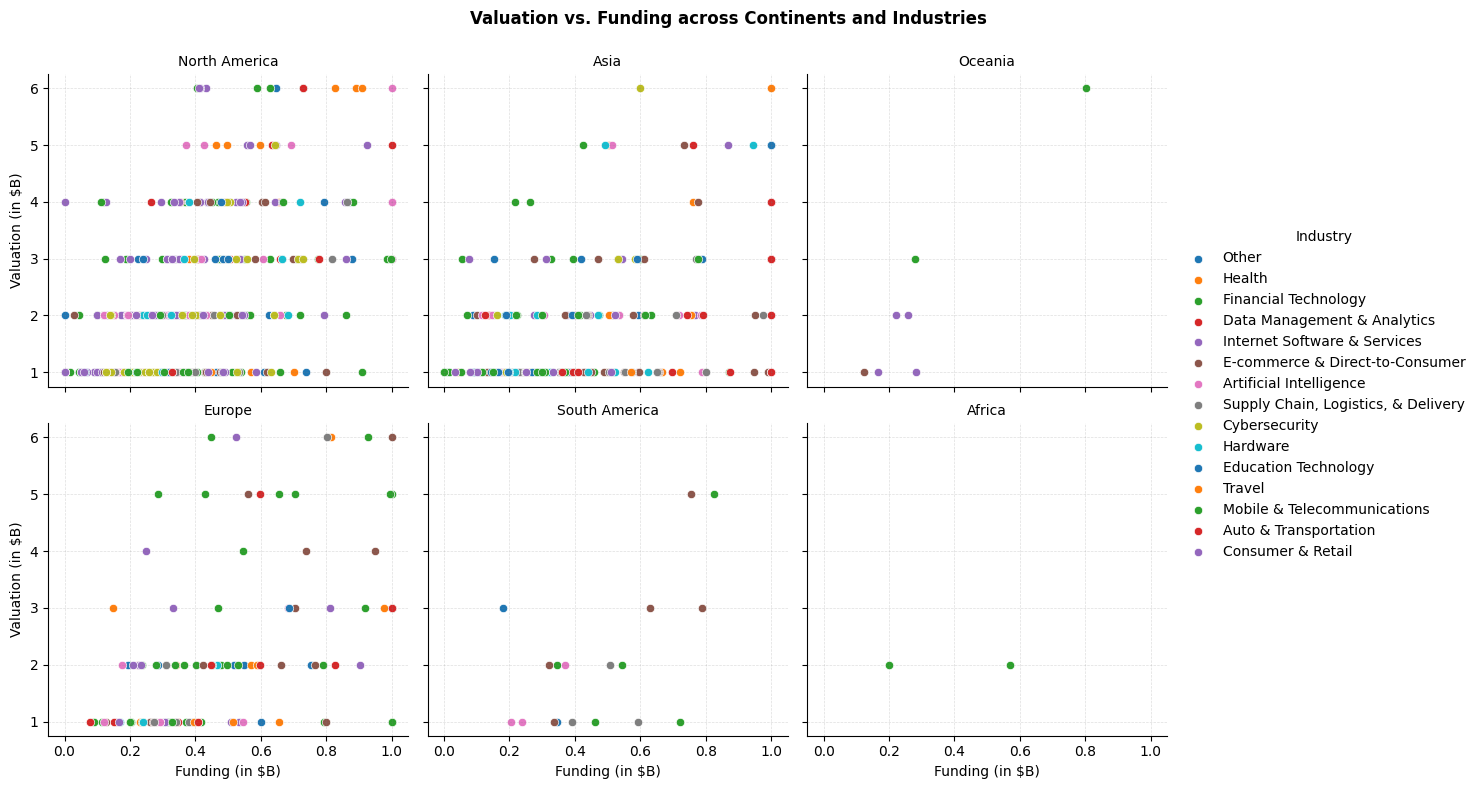

In [51]:
plt.figure(figsize=(12, 7))

g = sns.FacetGrid(unicorn_data, col='Continent', hue='Industry', col_wrap=3, height=4, aspect=1, palette='tab10')

g.map(sns.scatterplot, 'Funding', 'Valuation')
g.map(plt.grid, axis='both', color='gray', linestyle='--', linewidth=0.50, alpha=0.25)

g.fig.suptitle('Valuation vs. Funding across Continents and Industries', fontsize=12, fontweight='bold')
g.set_titles('{col_name}')
g.set_xlabels('Funding (in $B)', fontsize=10)
g.set_ylabels('Valuation (in $B)', fontsize=10)
g.add_legend()

plt.subplots_adjust(top=0.90)
plt.show()

##### Expanded Correlation Matrix

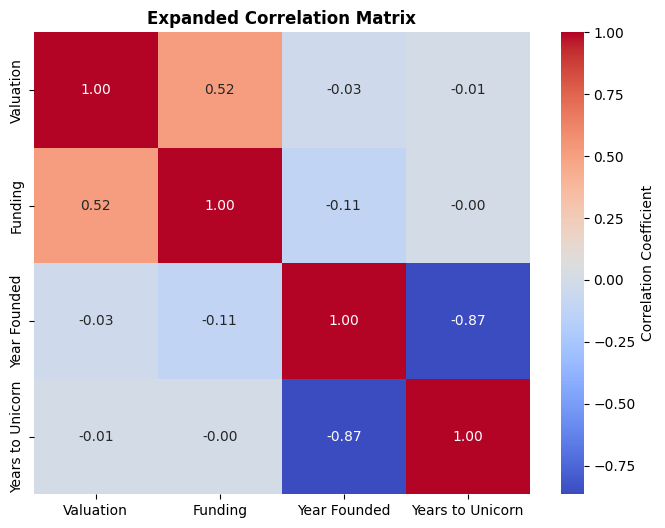

In [52]:
plt.figure(figsize=(8, 6))

expanded_corr = unicorn_data[['Valuation', 'Funding', 'Year Founded', 'Years to Unicorn']].corr()
sns.heatmap(expanded_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Expanded Correlation Matrix', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.show()

## **Step 7: Feature Engineering**

##### Companies by Years to Unicorn

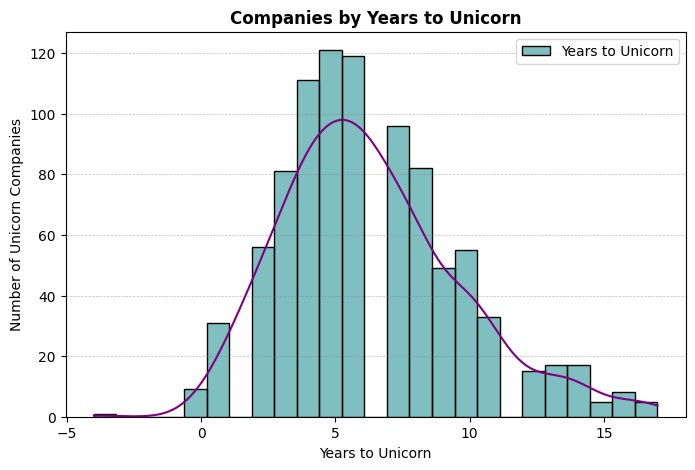

In [53]:
plt.figure(figsize=(8, 5))

distr_years_to_unicorn = sns.histplot(unicorn_data['Years to Unicorn'], bins=25, kde=True, color='teal', edgecolor='black', alpha=0.50, label='Years to Unicorn')
distr_years_to_unicorn.lines[0].set_color('purple')

plt.title('Companies by Years to Unicorn', fontsize=12, fontweight='bold')
plt.xlabel('Years to Unicorn', fontsize=10)
plt.ylabel('Number of Unicorn Companies', fontsize=10)
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.50, alpha=0.50)
plt.show()